In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
cc = pd.read_csv("creditcardfraud.zip")

In [3]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
cc['Class'] = cc['Class'].astype('bool')

In [5]:
train, test = train_test_split(cc, test_size=0.2, random_state=42)

In [6]:
feat_cols = cc.drop(['Class'], axis=1).columns

In [7]:
vanilla = linear_model.LogisticRegression(C=10000000000000)
X_train = train[feat_cols]
Y_train = train['Class']
vanilla.fit(X_train, Y_train)

LogisticRegression(C=10000000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [8]:
X_test = test[feat_cols]
Y_test = test['Class']

In [9]:
Y_pred = vanilla.predict(X_test)

In [11]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

In [12]:
print(tn, fp)
print(fn, tp)
# want to minimize false negatives

56853 11
46 52


In [13]:
vanilla.predict_proba(X_test)

array([[1.72897266e-06, 9.99998271e-01],
       [9.99462512e-01, 5.37487680e-04],
       [9.98463246e-01, 1.53675400e-03],
       ...,
       [9.95713900e-01, 4.28609974e-03],
       [9.99819615e-01, 1.80384756e-04],
       [9.99807654e-01, 1.92346317e-04]])

In [14]:
Y_score = vanilla.predict_proba(X_test)

In [15]:
Y_score

array([[1.72897266e-06, 9.99998271e-01],
       [9.99462512e-01, 5.37487680e-04],
       [9.98463246e-01, 1.53675400e-03],
       ...,
       [9.95713900e-01, 4.28609974e-03],
       [9.99819615e-01, 1.80384756e-04],
       [9.99807654e-01, 1.92346317e-04]])

In [16]:
Y_score[:, 1]

array([9.99998271e-01, 5.37487680e-04, 1.53675400e-03, ...,
       4.28609974e-03, 1.80384756e-04, 1.92346317e-04])

In [17]:
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds = [None, None]
for i in range(2):
    fpr[i], tpr[i], thresholds[i] = roc_curve(Y_test, Y_score[:, 1])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [18]:
roc_df = pd.DataFrame({"fpr": fpr[1], "tpr": tpr[1], "thres": thresholds[1]})

In [19]:
triples = roc_df.apply(lambda x: (x["fpr"], x["tpr"], x["thres"]), axis=1)

In [20]:
fpr[1]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.75858188e-05, 1.75858188e-05, 7.03432752e-05, 7.03432752e-05,
       1.05514913e-04, 1.05514913e-04, 1.23100732e-04, 1.23100732e-04,
       1.40686550e-04, 1.40686550e-04, 1.58272369e-04, 1.58272369e-04,
       1.75858188e-04, 1.75858188e-04, 1.93444007e-04, 1.93444007e-04,
       2.11029826e-04, 2.11029826e-04, 2.28615644e-04, 2.28615644e-04,
       2.46201463e-04, 2.46201463e-04, 3.16544738e-04, 3.16544738e-04,
       3.69302195e-04, 3.69302195e-04, 3.86888014e-04, 3.86888014e-04,
       4.57231289e-04, 4.57231289e-04, 4.74817107e-04, 4.74817107e-04,
       5.09988745e-04, 5.09988745e-04, 5.27574564e-04, 5.27574564e-04,
       5.62746201e-04, 5.62746201e-04, 5.80332020e-04, 5.80332020e-04,
       7.21018571e-04, 7.21018571e-04, 8.96876759e-04, 8.96876759e-04,
       1.40686550e-03, 1.40686550e-03, 1.70582442e-03, 1.70582442e-03,
       1.74099606e-03, 1.74099606e-03, 2.67304446e-03, 2.67304446e-03,
      

In [21]:
thresholds[1]

array([9.99999999e-01, 9.99999840e-01, 9.99999804e-01, 9.99999654e-01,
       9.99999512e-01, 9.99998271e-01, 9.99929037e-01, 9.99818987e-01,
       9.99478672e-01, 9.98846034e-01, 9.98753834e-01, 9.97987585e-01,
       9.97800852e-01, 9.72172617e-01, 9.62627972e-01, 7.43661512e-01,
       6.41948624e-01, 5.90668262e-01, 5.69385762e-01, 5.49285263e-01,
       4.81804347e-01, 4.48072579e-01, 4.47696669e-01, 4.39803027e-01,
       4.28699952e-01, 3.54303575e-01, 2.48747111e-01, 2.47140113e-01,
       2.40362320e-01, 2.38777106e-01, 2.29513942e-01, 1.79457104e-01,
       1.48420230e-01, 1.45985249e-01, 1.37086454e-01, 1.36393730e-01,
       1.29287460e-01, 1.27650299e-01, 1.27341898e-01, 1.23435733e-01,
       1.17499770e-01, 1.16917435e-01, 1.15000866e-01, 1.08188720e-01,
       9.06319608e-02, 8.93081947e-02, 7.66307742e-02, 7.60592355e-02,
       5.42644885e-02, 5.35781667e-02, 4.92205159e-02, 4.87665782e-02,
       4.79975963e-02, 4.78194073e-02, 3.55483016e-02, 3.55392365e-02,
      

C:\Users\e.istre91\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


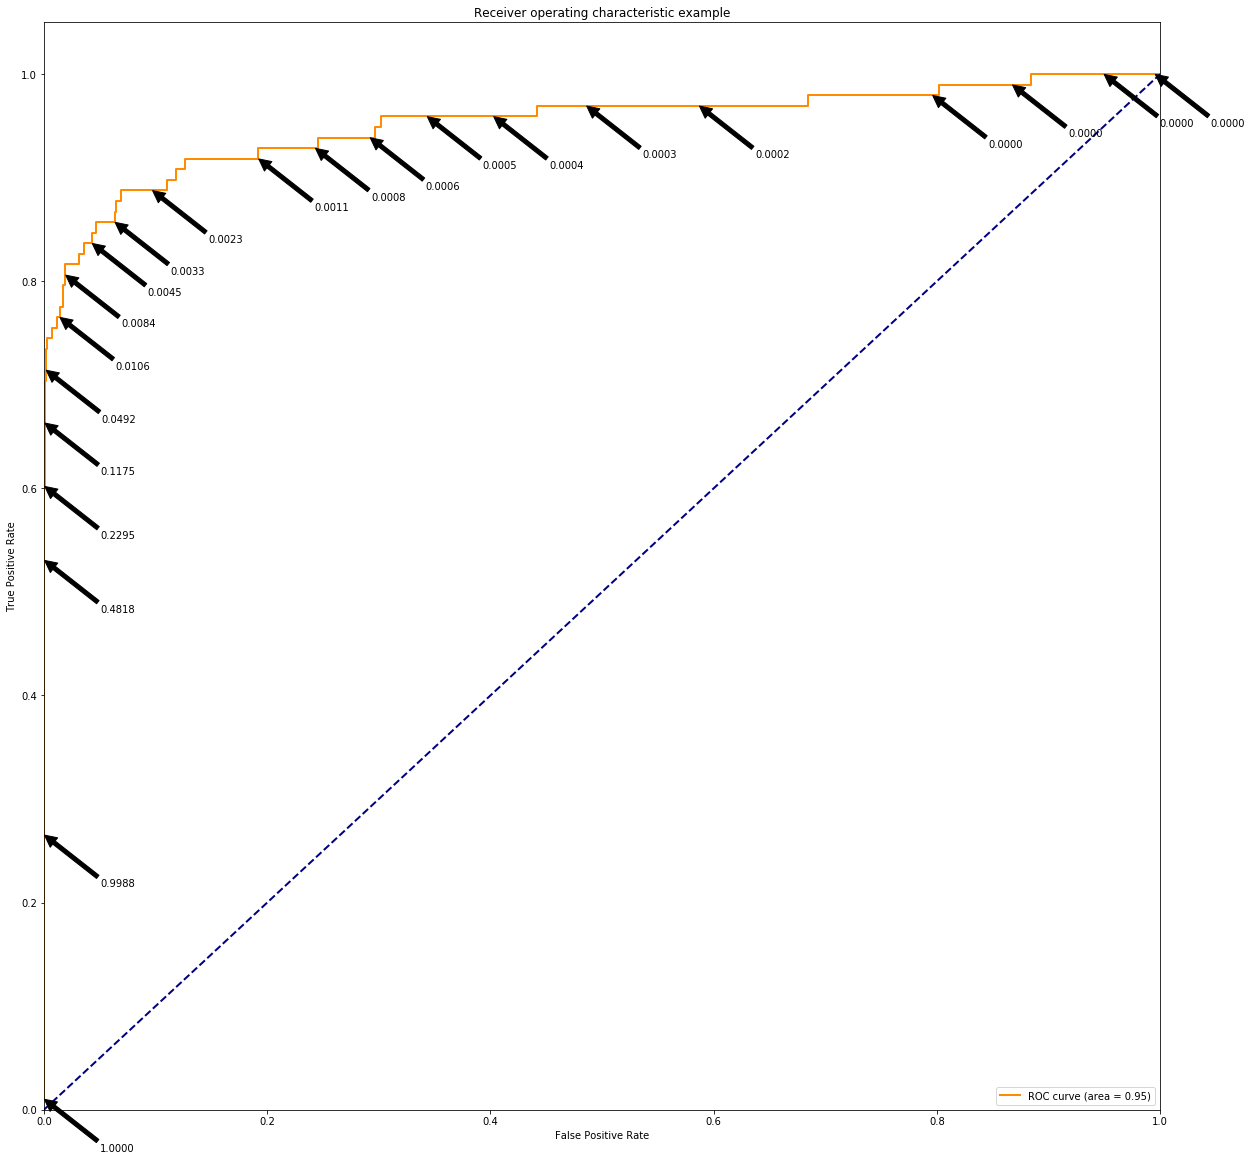

In [33]:
fig = plt.figure(figsize=(20,20))
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

ax = fig.add_subplot(111)
timing = 0
for x, y, thres in triples:
    if timing % 10 == 0:
        ax.annotate("{:.{}f}".format(thres, 4), xy=(x, y), xytext=(x+.05, y+-.05),
                   arrowprops=dict(facecolor='black', shrink=0.005))
    timing += 1

plt.show()